##### Lending Club Data Project

# 01 Data Cleansing

In [ ]:
reset -fs

## 01.01 Variable Descriptions

| variable                   | description                                                                                                                                                                                              |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| acc_now_delinq             | The number of accounts on which the borrower is now delinquent.                                                                                                                                          |
| addr_state                 | state provided by the borrower in the loan application                                                                                                                                                   |
| annual_inc                 | self-reported annual income provided by the borrower during registration                                                                                                                                 |
| application_type           | indicates whether the loan is an individual application or a joint application with two co-borrowers                                                                                                     |
| chargeoff_within_12_mths   | number of charge-offs within 12 months.                                                                                                                                                                  |
| collection_recovery_fee    | post charge off collection fee                                                                                                                                                                           |
| collections_12_mths_ex_med | Number of collections in 12 months excluding medical collections                                                                                                                                         |
| delinq_amnt                | amount the borrower is now delinquent                                                                                                                                                                    |
| delinq_2yrs                | delinquency in the borrower's credit file for the past 2 years                                                                                                                                           |
| dti                        | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. |
| earliest_cr_line           | The month the borrower's earliest reported credit line was opened                                                                                                                                        |
| emp_length                 | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.                                                                        |
| emp_title                  | The job title supplied by the Borrower when applying for the loan.*                                                                                                                                      |
| funded_amnt                | The total amount committed to that loan at that point in time.                                                                                                                                           |
| funded_amnt_inv            | The total amount committed by investors for that loan at that point in time.                                                                                                                             |
| grade                      | LC assigned loan grade                                                                                                                                                                                   |
| home_ownership             | The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.                                                                                      |
| id                         | A unique LC assigned ID for the loan listing.                                                                                                                                                            |
| initial_list_status        | The initial listing status of the loan. Possible values are – W, F                                                                                                                                       |
| inq_last_6mths             | The number of inquiries in past 6 months (excluding auto and mortgage inquiries)                                                                                                                         |
| installment                | The monthly payment owed by the borrower if the loan originates.                                                                                                                                         |
| int_rate                   | Interest Rate on the loan                                                                                                                                                                                |
| issue_d                    | The month which the loan was funded                                                                                                                                                                      |
| last_credit_pull_d         | The most recent month LC pulled credit for this loan                                                                                                                                                     |
| last_pymnt_amnt            | Last total payment amount received                                                                                                                                                                       |
| last_pymnt_d               | Last month payment was received                                                                                                                                                                          |
| loan_amnt                  | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.                             |
| loan_status                | Current status of the loan <br> * Fully Paid: Principal amount of loans that have been fully paid <br> * Current: Principal amount of loans that are in "current" or "grace period" status <br> * Late: Principal amount of loans that are 16+ days late but have not charged off <br> * Charged off (net): Total amount charged off net of any funds subsequently recovered. <br> Principal and interest payments received prior to charge off and recoveries made after charge off are not included here; they are included in the "Principal Payments Received" or "Interest Payments Received" columns. As a result, the fully paid, current, late, and charged off columns do not add up to 100% for the "% of Issued dollars" view.                                                                                                                                                                            |
| member_id                  | A unique LC assigned Id for the borrower member.                                                                                                                                                         |
| open_acc                   | The number of open credit lines in the borrower's credit file.                                                                                                                                           |
| out_prncp                  | Remaining outstanding principal for total amount funded                                                                                                                                                  |
| out_prncp_inv              | Remaining outstanding principal for portion of total amount funded by investors                                                                                                                          |
| policy_code                | publicly available policy_code=1 new products not publicly available policy_code=2                                                                                                                       |
| pub_rec                    | Number of derogatory public records                                                                                                                                                                      |
| pub_rec_bankruptcies       | Number of derogatory public records of bankruptcies                                                                                                                                                                      |
| purpose                    | A category provided by the borrower for the loan request.                                                                                                                                                |
| pymnt_plan                 | Indicates if a payment plan has been put in place for the loan                                                                                                                                           |
| recoveries                 | post charge off gross recovery                                                                                                                                                                           |
| revol_bal                  | Total credit revolving balance                                                                                                                                                                           |
| revol_util                 | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.                                                                               |
| sub_grade                  | LC assigned loan subgrade                                                                                                                                                                                |
| tax_liens                  | Legal claim against the assets of an individual or business who fails to pay taxes owed to the government                                                                                                |
| term                       | The number of payments on the loan. Values are in months and can be either 36 or 60.                                                                                                                     |
| title                      | The loan title provided by the borrower                                                                                                                                                                  |
| total_acc                  | The total number of credit lines currently in the borrower's credit file                                                                                                                                 |
| total_pymnt                | Payments received to date for total amount funded                                                                                                                                                        |
| total_pymnt_inv            | Payments received to date for portion of total amount funded by investors                                                                                                                                |
| total_rec_int              | Interest received to date                                                                                                                                                                                |
| total_rec_late_fee         | Late fees received to date                                                                                                                                                                               |
| total_rec_prncp            | Principal received to date                                                                                                                                                                               |
| verification status        | Indicates if the borrowers' income was verified by LC, not verified, or if the income source was verified                                                                                       |
| zip_code                   | The first 3 numbers of the zip code provided by the borrower in the loan application.                                                                                                                    |

## 01.02 Data Import

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from scipy import stats
import seaborn as sns
import statsmodels.api as sms
import statsmodels.formula.api as smf

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import re 
import math

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

#import warnings
#warnings.filterwarnings("ignore")

In [3]:
loans_total = pd.read_csv("loans_2007.csv" )
pd.set_option("display.max_columns", None)
loans_total.head()

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning:

Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,461.73,461.73,3581.120000,3581.12,2538.27,1042.85,0.00,0.00,0.00,Jun-2016,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [4]:
loans_total.shape

(42538, 52)

## 01.03 Check data types and delete varliables not needed at first sight

In [5]:
#id and member id are dropped since they have no predictive value
loans_total.drop('id', axis = 1, inplace = True);
loans_total.drop('member_id', axis = 1, inplace = True);

Checking if the object variables' datatypes need to be changed.

In [6]:
loans_total.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   term                 42535 non-null  object
 1   int_rate             42535 non-null  object
 2   grade                42535 non-null  object
 3   sub_grade            42535 non-null  object
 4   emp_title            39909 non-null  object
 5   emp_length           41423 non-null  object
 6   home_ownership       42535 non-null  object
 7   verification_status  42535 non-null  object
 8   issue_d              42535 non-null  object
 9   loan_status          42535 non-null  object
 10  pymnt_plan           42535 non-null  object
 11  purpose              42535 non-null  object
 12  title                42522 non-null  object
 13  zip_code             42535 non-null  object
 14  addr_state           42535 non-null  object
 15  earliest_cr_line     42506 non-null  object
 16  revo

These changes will be executed:
* change to float:
    * revol_util
    * int_rate
* change to date:
    * issue_d
    * earliest_cr_line
    * last_pymnt_d
    * last_credit_pull_d
* drop from dataset, because only one value
    * pymnt_plan
    * initial_list_status
    * application_type

In [7]:
loans_total.int_rate = loans_total.int_rate.str.replace("%","")
loans_total.int_rate = loans_total.int_rate.astype(float)
loans_total.int_rate = (loans_total.int_rate)/100
loans_total.revol_util = loans_total.revol_util.str.replace("%","")
loans_total.revol_util = loans_total.revol_util.astype(float)
loans_total.revol_util = (loans_total.revol_util)/100

In [8]:
loans_total.drop(["pymnt_plan", "initial_list_status", "application_type"], axis=1, inplace=True)

In [9]:
loans_total.shape

(42538, 47)

In [10]:
from datetime import datetime
loans_total.issue_d = pd.to_datetime(loans_total.issue_d)
loans_total.earliest_cr_line = pd.to_datetime(loans_total.earliest_cr_line)
loans_total.last_pymnt_d = pd.to_datetime(loans_total.last_pymnt_d)
loans_total.last_credit_pull_d = pd.to_datetime(loans_total.last_credit_pull_d)

In [11]:
loans_total.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   term                 42535 non-null  object
 1   grade                42535 non-null  object
 2   sub_grade            42535 non-null  object
 3   emp_title            39909 non-null  object
 4   emp_length           41423 non-null  object
 5   home_ownership       42535 non-null  object
 6   verification_status  42535 non-null  object
 7   loan_status          42535 non-null  object
 8   purpose              42535 non-null  object
 9   title                42522 non-null  object
 10  zip_code             42535 non-null  object
 11  addr_state           42535 non-null  object
dtypes: object(12)
memory usage: 3.9+ MB


Let's have a look if frequencies in the target variable are balanced. 

In [12]:
loans_total.loan_status.value_counts()

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64

In [13]:
# Drop three missing values in target variable in order to avoid problems in ther train test split. 
loans_total.loan_status.dropna();

In [14]:
loans_total.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648.0,0.837,9.0,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,2015-01-01,171.62,2016-06-01,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687.0,0.094,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
loans_total.term.value_counts()

 36 months    31534
 60 months    11001
Name: term, dtype: int64

In [16]:
loans_total.term = loans_total.term.str.replace('months', '')
loans_total.term.astype('float');

In [17]:
loans_total.loan_status.value_counts()

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64

Since the policy status has its own variable, the distinction between policy met/ not met does not make sense here. Therefore, only the values fully paid/ charged off/ current/ late/ in grace period/ default will be differed.

In [18]:
loans_total.loan_status = loans_total.loan_status.str.replace('Does not meet the credit policy. Status:', '')

In [19]:
loans_total.loan_status.value_counts()

Fully Paid            35124
Charged Off            6395
Current                 961
Late (31-120 days)       24
In Grace Period          20
Late (16-30 days)         8
Default                   3
Name: loan_status, dtype: int64

Title has to many options and is also represented by the purpose, so it's dropped.

In [20]:
loans_total.drop("title", axis = 1, inplace = True);

In [21]:
loans_total.dti = (loans_total.dti)/100

Dropping of out_prncp, out_prncp_inv, total_rec_late_fee, recoveries, collection recovery fee, collections_12_mths_ex_med, policy code, acc_now_delinq, chargeoff_within_12_mths and taxliens because the majority of the data is null.

In [22]:
loans_total.drop("out_prncp", axis = 1, inplace = True);
loans_total.drop("out_prncp_inv", axis = 1, inplace = True);
loans_total.drop("total_rec_late_fee", axis = 1, inplace = True);
loans_total.drop("recoveries", axis = 1, inplace = True);
loans_total.drop("collection_recovery_fee", axis = 1, inplace = True);
loans_total.drop("collections_12_mths_ex_med", axis = 1, inplace = True);
loans_total.drop("policy_code", axis = 1, inplace = True);
loans_total.drop("acc_now_delinq", axis = 1, inplace = True);
loans_total.drop("chargeoff_within_12_mths", axis = 1, inplace = True);
loans_total.drop("delinq_amnt", axis = 1, inplace = True);
loans_total.drop("tax_liens", axis = 1, inplace = True);

In [23]:
#

In [24]:
#Replace numerical nans by -9999 as impossible value
loans_total.loc[:, ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt', 'pub_rec_bankruptcies']] = loans_total.loc[:, ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt', 'pub_rec_bankruptcies']].fillna(-9999)

In [25]:
#Replace string nans by '?' as impossible value
loans_total.loc[:, ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'earliest_cr_line',
       'last_pymnt_d', 'last_credit_pull_d']] = loans_total.loc[:, ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose','zip_code', 'addr_state', 'earliest_cr_line',
       'last_pymnt_d', 'last_credit_pull_d']].fillna("?");

In [26]:
#Replace date nans by 1900-01-01 as impossible value
loans_total.loc[:, ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']] = loans_total.loc[:, ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']].fillna("1900-01-01");

## 01.04 Train Test Split

The dataset is splitted into train and test sets. Any data manipulations will be exectued for train and test data separately. 

Since frequencies are not balanced, the train-test-split will be stratified. 
Additionally, nan-values are not accepted in the train-test-split. Therefore, the nans are temporarily replaced by -999 as an impossible value and finally cleansed at a later time.  

In [27]:
#Create train and test datasets
y = loans_total.loan_status
X = loans_total[[ 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies']]

explanatory_vars = list(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42, stratify = y)

In [28]:
#Save test data in separate file 
test_data = pd.concat([X_test, y_test], axis = 1)
test_data.reset_index(inplace = True)
test_data.drop('index', inplace = True, axis = 1)
test_data.to_csv('test_data.csv')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_status
0,7500.0,7500.0,260.406194,36,0.1450,258.16,E,E2,Oracle,10+ years,MORTGAGE,109000.0,Not Verified,2008-05-01 00:00:00,credit_card,802xx,CO,0.2184,0.0,1994-10-01 00:00:00,2.0,13.0,0.0,44098.0,0.923,26.0,9293.641706,263.90,7500.0,1793.65,2011-05-01 00:00:00,258.62,2016-06-01 00:00:00,0.0,Fully Paid
1,8000.0,8000.0,3045.510000,36,0.1221,266.52,B,B5,Crossbow Technologies,7 years,MORTGAGE,75000.0,Source Verified,2008-12-01 00:00:00,debt_consolidation,950xx,CA,0.1458,0.0,1993-04-01 00:00:00,1.0,6.0,0.0,30692.0,0.924,22.0,9151.786899,3379.45,8000.0,1151.79,2011-03-01 00:00:00,629.61,2013-04-01 00:00:00,0.0,Fully Paid
2,20000.0,20000.0,19850.000000,36,0.1461,689.51,D,D1,American Association for Clinical Chemistry,4 years,RENT,51996.0,Verified,2009-09-01 00:00:00,debt_consolidation,223xx,VA,0.1484,0.0,1999-07-01 00:00:00,1.0,8.0,0.0,20916.0,0.656,11.0,24821.990656,24635.83,20000.0,4821.99,2012-09-01 00:00:00,716.02,2015-11-01 00:00:00,0.0,Fully Paid
3,9000.0,9000.0,8900.989250,36,0.1253,301.20,B,B5,Pitney Bowes,5 years,RENT,30000.0,Verified,2009-09-01 00:00:00,debt_consolidation,112xx,NY,0.0844,0.0,2000-06-01 00:00:00,4.0,10.0,0.0,13990.0,0.779,17.0,11008.257776,10884.79,9000.0,1978.20,2014-02-01 00:00:00,169.78,2014-02-01 00:00:00,0.0,Fully Paid
4,12000.0,12000.0,11900.000000,60,0.1149,263.86,B,B4,Mirasol Club Inc,2 years,RENT,30156.0,Verified,2010-09-01 00:00:00,debt_consolidation,334xx,FL,0.1576,0.0,2004-10-01 00:00:00,0.0,10.0,0.0,11246.0,0.364,14.0,15747.329982,15616.10,12000.0,3747.33,2015-01-01 00:00:00,2359.15,2015-01-01 00:00:00,0.0,Fully Paid


In [29]:
#Save train data in separate file 
train_data = pd.concat([X_train, y_train], axis = 1)
train_data.reset_index(inplace = True)
train_data.drop('index', inplace = True, axis = 1)
train_data.to_csv('train_data.csv')
train_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_status
0,15000.0,15000.0,15000.0,36,0.1422,514.27,C,C5,Penmark Management LLC.,8 years,RENT,102000.0,Verified,2010-03-01 00:00:00,debt_consolidation,110xx,NY,0.0964,1.0,1996-01-01 00:00:00,1.0,6.0,0.0,916.0,0.0000,37.0,18514.510481,18514.51,15000.0,3514.51,2013-03-01 00:00:00,553.84,2015-11-01 00:00:00,0.0,Fully Paid
1,10000.0,10000.0,9850.0,36,0.1059,325.45,B,B2,BAE Systems,3 years,RENT,80038.0,Verified,2011-06-01 00:00:00,debt_consolidation,200xx,DC,0.2272,0.0,2002-07-01 00:00:00,2.0,11.0,0.0,10420.0,0.6020,29.0,11534.483930,11361.47,10000.0,1534.48,2013-07-01 00:00:00,3744.28,2016-06-01 00:00:00,0.0,Fully Paid
2,10000.0,10000.0,9150.0,36,0.0932,319.47,A,A4,"FOLIOfn, Inc.",3 years,RENT,85000.0,Not Verified,2008-12-01 00:00:00,educational,222xx,VA,0.0781,0.0,2001-10-01 00:00:00,1.0,8.0,0.0,2001.0,0.1210,23.0,10858.473145,9935.50,10000.0,858.47,2010-01-01 00:00:00,7037.84,2010-01-01 00:00:00,0.0,Fully Paid
3,5000.0,5000.0,5000.0,60,0.1969,131.61,E,E5,Vista Del Mar Medical Group,3 years,OWN,38004.0,Not Verified,2011-05-01 00:00:00,other,930xx,CA,0.0950,0.0,1996-04-01 00:00:00,0.0,2.0,0.0,0.0,0.8131,7.0,7896.960000,7896.96,5000.0,2896.96,2016-05-01 00:00:00,263.58,2016-06-01 00:00:00,0.0,Fully Paid
4,14000.0,14000.0,13750.0,60,0.1038,300.09,B,B1,Swagelok Company,10+ years,MORTGAGE,58000.0,Verified,2010-08-01 00:00:00,small_business,442xx,OH,0.1043,0.0,1995-02-01 00:00:00,2.0,6.0,0.0,4683.0,0.1750,30.0,15139.723716,14869.37,14000.0,1139.72,2011-07-01 00:00:00,12448.72,2011-06-01 00:00:00,0.0,Fully Paid


## 01.06 Missing values in training data

In [30]:
#Re-establish missing data which were temporarily replaced by impossible values for the train test split. 
train_data.replace('?', np.nan, inplace = True)
train_data.replace(-9999, np.nan, inplace = True)
train_data.replace('1900-01-01', np.nan, inplace = True)

Missing data with occurences < 100 will be dropped.

In [31]:
train_data.isna().sum()

loan_amnt                  2
funded_amnt                2
funded_amnt_inv            2
term                       2
int_rate                   2
installment                2
grade                      2
sub_grade                  2
emp_title               1757
emp_length               739
home_ownership             2
annual_inc                 5
verification_status        2
issue_d                    2
purpose                    2
zip_code                   2
addr_state                 2
dti                        2
delinq_2yrs               21
earliest_cr_line          21
inq_last_6mths            21
open_acc                  21
pub_rec                   21
revol_bal                  2
revol_util                66
total_acc                 21
total_pymnt                2
total_pymnt_inv            2
total_rec_prncp            2
total_rec_int              2
last_pymnt_d              61
last_pymnt_amnt            2
last_credit_pull_d         5
pub_rec_bankruptcies     921
loan_status   

In [32]:
train_data.dropna(subset = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d'], inplace = True)

In [33]:
train_data.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               1737
emp_length               732
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
last_pymnt_d               0
last_pymnt_amnt            0
last_credit_pull_d         0
pub_rec_bankruptcies     896
loan_status   

In [34]:
train_data[['pub_rec_bankruptcies']].describe().round(2)

,pub_rec_bankruptcies
count,27480.00
mean,0.05
std,0.21
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,2.00


Since at least 75 % of the data is null, missing values will be replaced by null (= median).

In [35]:
train_data.pub_rec_bankruptcies = train_data[['pub_rec_bankruptcies']].fillna(0)

In [36]:
train_data.emp_title.value_counts()

US Army                                            96
Bank of America                                    81
USAF                                               45
IBM                                                40
Wells Fargo                                        40
                                                   ..
parsons                                             1
FirstCaribbean International Bank owned by CIBC     1
Sky Lakes Medical Center                            1
Agnitsch Electric, Inc.                             1
CORNING INCORPORATED                                1
Name: emp_title, Length: 21322, dtype: int64

The variable emp_title is dropped for group sizes are too small to draw inferences. 

In [37]:
train_data.drop("emp_title", axis = 1, inplace = True)

In [38]:
train_data[['emp_length']].describe().round(2)

,emp_length
count,27644
unique,11
top,10+ years
freq,6298


The mode is not frequent enough to replace missing values bz mode. Therefore, missing values are replaced bz a new value 'unknown'.

In [39]:
train_data.emp_length.fillna('unknown', inplace = True)

## 01.07 Outlier detection and handling

Outliers will only be removed if they are obviously errorous/ impossible values. Otherwise they will remain.
For outlier detection, box plots are displayed for numerical values. For categorical data, outliers are identified via histograms.

In [40]:
train_data.select_dtypes(include = 'number').columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

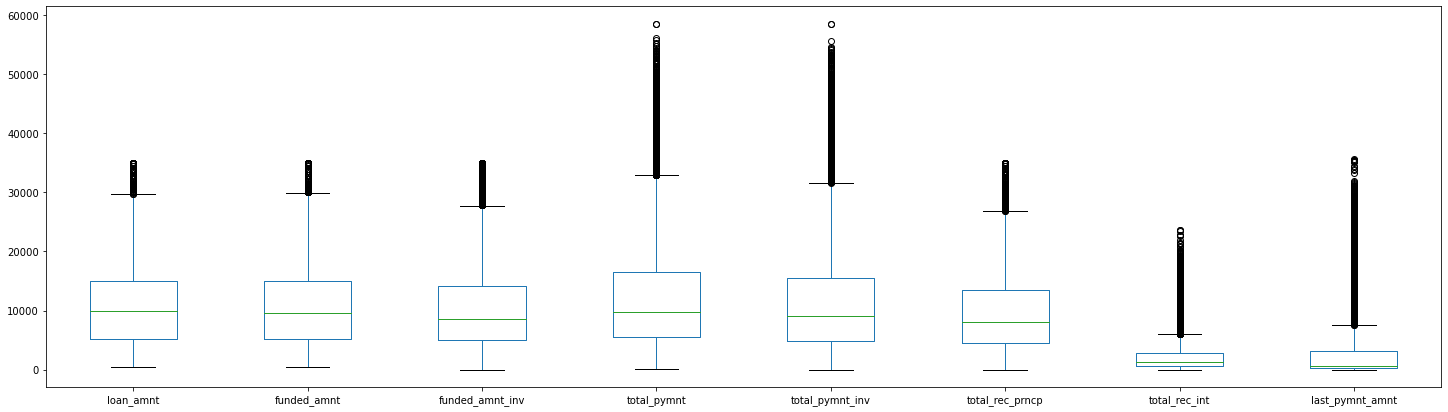

In [41]:
train_data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt']].plot(kind = "box", figsize = (25, 7));

All the data seem legit, so outliers will not be removed here.

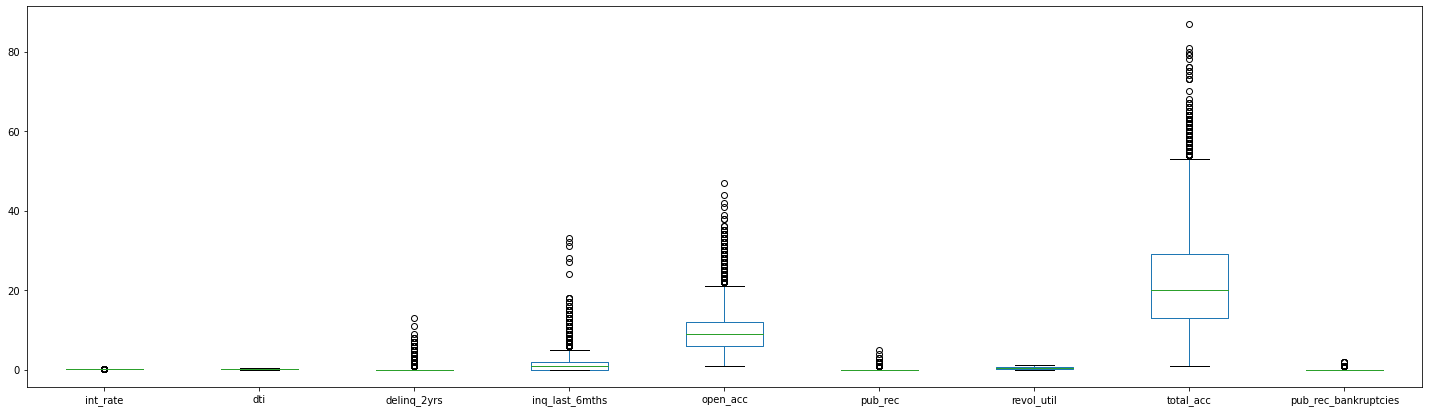

In [42]:
train_data[[ 'int_rate', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies']].plot(kind = "box", figsize = (25, 7));

All the data seem legit, so outliers will not be removed here.

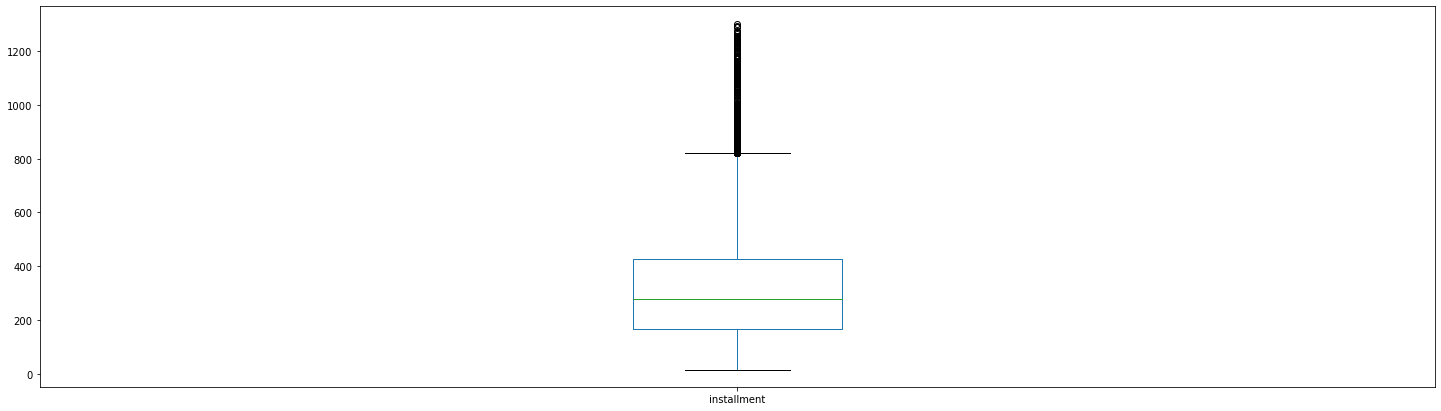

In [43]:
train_data['installment'].plot(kind = "box", figsize = (25, 7));

All the data seem legit, so outliers will not be removed here.

In [44]:
train_data.annual_inc.describe()

count    2.837600e+04
mean     6.947627e+04
std      6.874788e+04
min      1.896000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

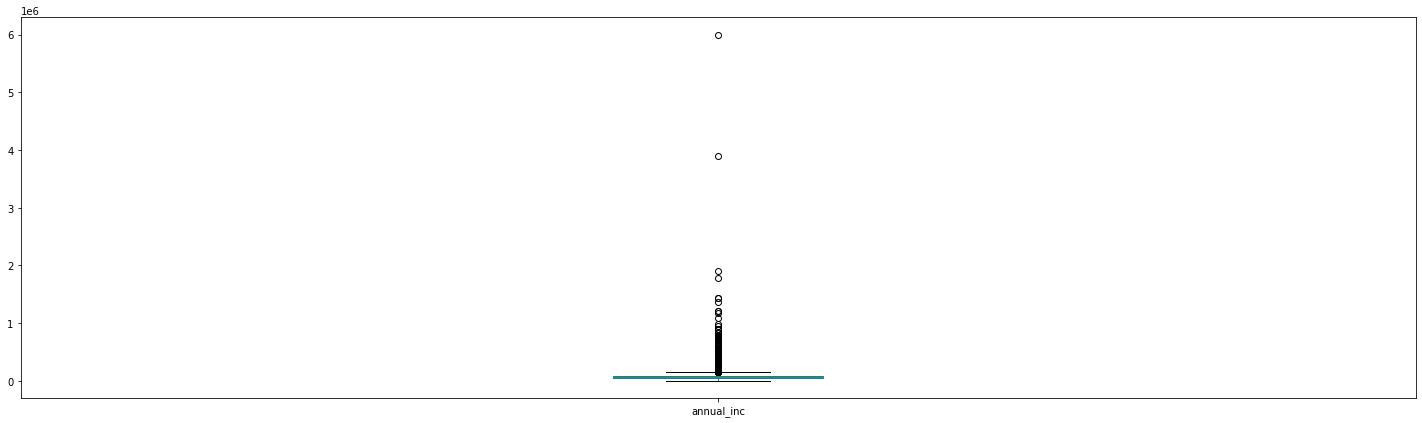

In [45]:
train_data['annual_inc'].plot(kind = "box", figsize = (25, 7));

In [46]:
#Since it is possible but not likely that the annual income is that high, the two highest data points are removed.
train_data.drop(train_data['annual_inc'].idxmax(), inplace = True);
train_data.drop(train_data['annual_inc'].idxmax(), inplace = True);

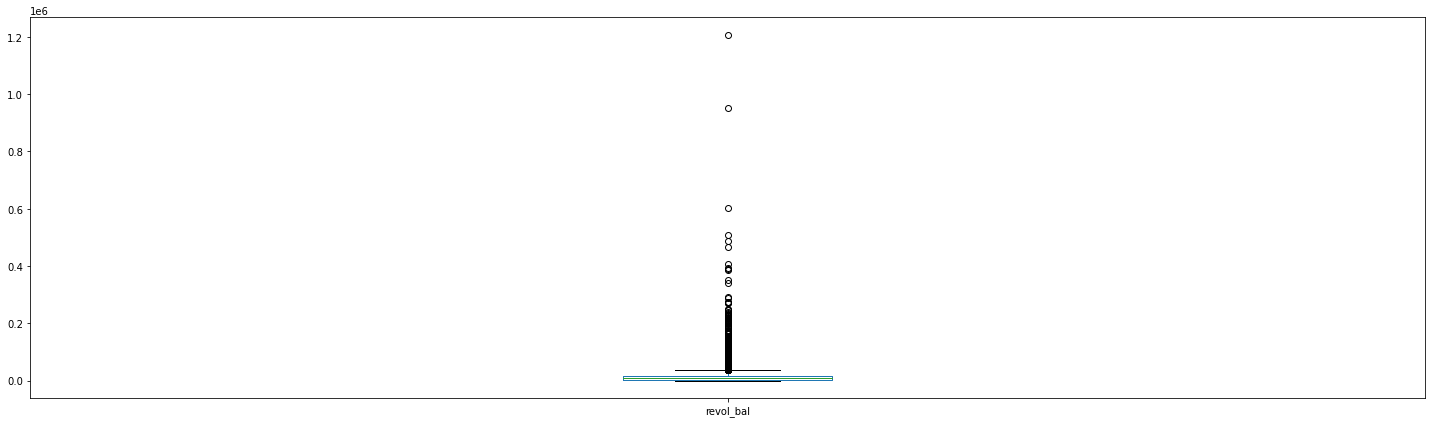

In [47]:
train_data['revol_bal'].plot(kind = "box", figsize = (25, 7));

In [48]:
#Since it is possible but not likely that the revol_bal is that high, the two highest data points are removed.
train_data.drop(train_data['revol_bal'].idxmax(), inplace = True);
train_data.drop(train_data['revol_bal'].idxmax(), inplace = True);

In [49]:
train_data.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d',
       'loan_status'],
      dtype='object')

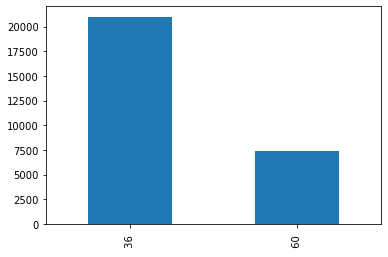

In [50]:
train_data.term.value_counts().plot(kind = 'bar');

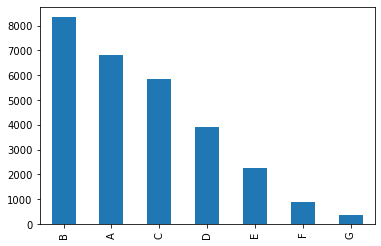

In [51]:
train_data.grade.value_counts().plot(kind = 'bar');

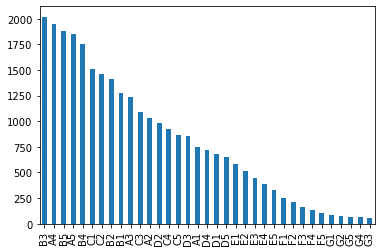

In [52]:
train_data.sub_grade.value_counts().plot(kind = 'bar');

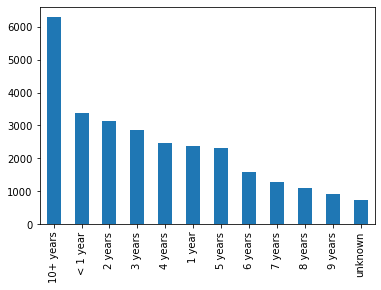

In [53]:
train_data.emp_length.value_counts().plot(kind = 'bar');

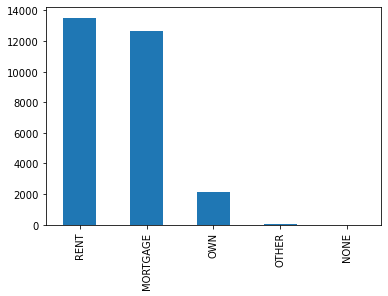

In [54]:
train_data.home_ownership.value_counts().plot(kind = 'bar');

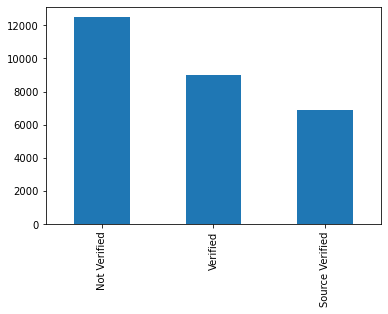

In [55]:
train_data.verification_status.value_counts().plot(kind = 'bar');

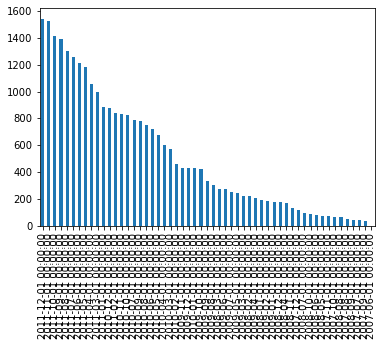

In [56]:
train_data.issue_d.value_counts().plot(kind = 'bar');

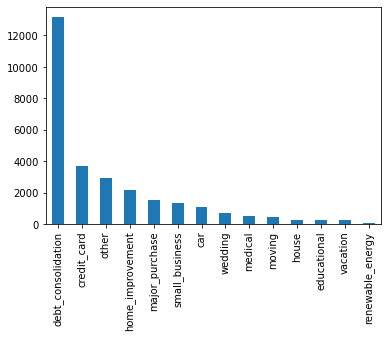

In [57]:
train_data.purpose.value_counts().plot(kind = 'bar');

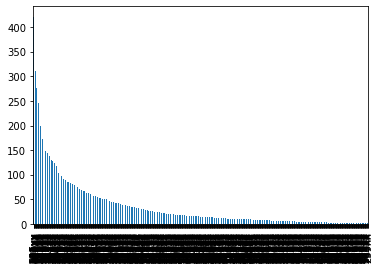

In [58]:
train_data.zip_code.value_counts().plot(kind = 'bar');

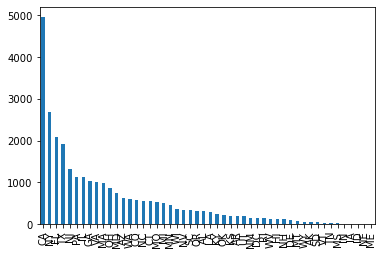

In [59]:
train_data.addr_state.value_counts().plot(kind = 'bar');

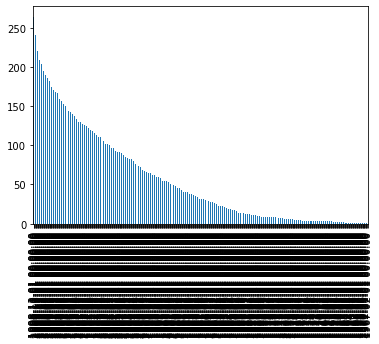

In [60]:
train_data.earliest_cr_line.value_counts().plot(kind = 'bar');

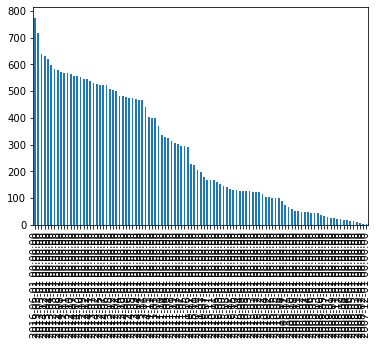

In [61]:
train_data.last_pymnt_d.value_counts().plot(kind = 'bar');

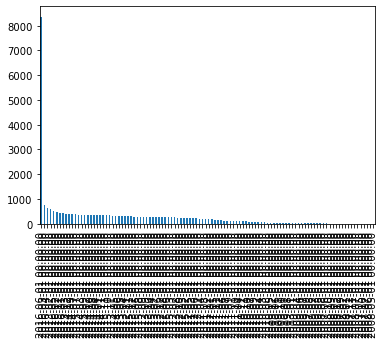

In [62]:
train_data.last_credit_pull_d.value_counts().plot(kind = 'bar');

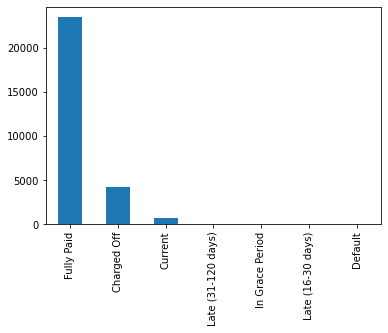

In [63]:
train_data.loan_status.value_counts().plot(kind = 'bar');

Although frequencies are partly very low, the outliers are kept for the values are legit in all categorical variables.

### Rescale train data

To account for outliers, data are rescaled using the RobustScaler.
The centering and scaling statistics of this scaler are based on percentiles and are therefore not influenced by a few number of very large marginal outliers. Consequently, the resulting range of the transformed feature values is larger than for the previous scalers and, more importantly, are approximately similar.

In [64]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
#Separate numerical and non-numerical variables since only the numerical ones can be rescaled.
X_train_rest =X_train.select_dtypes(exclude = 'number')
X_train_num = X_train.select_dtypes('number')
scaler.fit_transform(X_train_num);
X_train_num.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,pub_rec_bankruptcies
31981,15000.0,15000.0,15000.0,0.1422,514.27,102000.0,0.0964,1.0,1.0,6.0,0.0,916.0,0.0000,37.0,18514.510481,18514.51,15000.0,3514.51,553.84,0.0
13989,10000.0,10000.0,9850.0,0.1059,325.45,80038.0,0.2272,0.0,2.0,11.0,0.0,10420.0,0.6020,29.0,11534.483930,11361.47,10000.0,1534.48,3744.28,0.0
38049,10000.0,10000.0,9150.0,0.0932,319.47,85000.0,0.0781,0.0,1.0,8.0,0.0,2001.0,0.1210,23.0,10858.473145,9935.50,10000.0,858.47,7037.84,0.0
14890,5000.0,5000.0,5000.0,0.1969,131.61,38004.0,0.0950,0.0,0.0,2.0,0.0,0.0,0.8131,7.0,7896.960000,7896.96,5000.0,2896.96,263.58,0.0
26513,14000.0,14000.0,13750.0,0.1038,300.09,58000.0,0.1043,0.0,2.0,6.0,0.0,4683.0,0.1750,30.0,15139.723716,14869.37,14000.0,1139.72,12448.72,0.0


In [65]:
#Join all predictive variables again
X_train = pd.concat([X_train_num, X_train_rest], axis = 1)

In [66]:
X_train.to_csv('train_data_rescaled.csv')